In [40]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data_dir = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Normalized"

In [53]:
patient_ids = ["Pat8", "Pat9", "Pat11", "Pat13", "Pat14", "Pat15", "Pat16", "Pat17", "Pat19", "Pat21", "Pat23", "Pat24", "Pat25", "Pat27", "Pat29", "Pat30", "Pat31", "Pat32", "Pat33", "Pat34", "Pat35", "Pat36", "Pat38", "Pat40", "Pat41", "Pat42", "Pat44", "Pat46", "Pat47", "Pat48", "Pat49", "Pat50", "Pat51", "Pat52", "Pat54", "Pat57", "Pat58", "Pat62", "Pat68", "Pat76", "Pat77", "Pat79", "Pat80", "Pat81", "Pat83", "Pat86", "Pat87", "Pat88", "Pat90", "Pat91", "Pat92", "Pat93", "Pat94", "Pat95", "Pat99", "Pat100", "Pat101", "Pat102", "Pat103", "Pat104", "Pat105", "Pat107", "Pat109", "Pat112", "Pat113", "Pat114", "Pat115", "Pat116", "Pat118", "Pat119", "Pat120", "Pat122", "Pat124", "Pat125", "Pat126", "Pat127", "Pat128", "Pat129", "Pat130", "Pat132", "Pat133", "Pat134", "Pat135", "Pat136", "Pat137", "Pat138", "Pat139", "Pat140", "Pat141", "Pat143", "Pat144", "Pat145", "Pat146", "Pat147", "Pat174"]

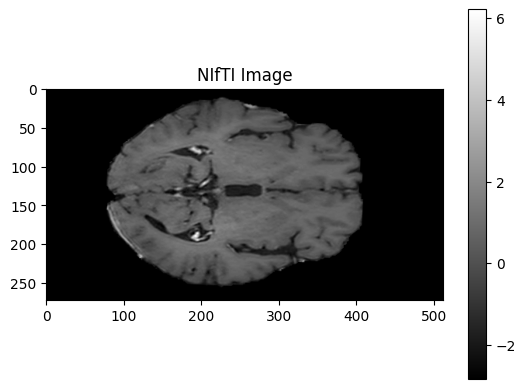

In [54]:
image_path = '/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Normalized/Pat8_COL_registered_zscore.nii.gz'
nifti_image = nib.load(image_path)

# Get the image data as a NumPy array
image_data = nifti_image.get_fdata()

# Display a slice of the image
slice_number = 250  # Change this to the desired slice number
plt.imshow(image_data[:, :, slice_number], cmap='gray')
plt.title('NIfTI Image')
plt.colorbar()
plt.show()

In [55]:
def load_and_preprocess_data(patient_id, machine, data_dir, crop_shape=None, resize_shape=None):
    if machine == "CHU":
        image_filename = f"{patient_id}_T1Gado_CHU_brain_zscore.nii.gz"
    elif machine == "COL":
        image_filename = f"{patient_id}_COL_registered_zscore.nii.gz"
    else:
        return None

    image_path = os.path.join(data_dir, image_filename)

    if os.path.exists(image_path):
        nifti_image = nib.load(image_path)
        image_data = nifti_image.get_fdata()

        # If crop_shape is provided, crop the image
        if crop_shape is not None:
            image_data = crop_image(image_data, crop_shape)

        # If resize_shape is provided, resize the image
        if resize_shape is not None:
            image_data = resize_image(image_data, resize_shape)

        return image_data

def crop_image(image, crop_shape_divisor):
    original_shape = np.array(image.shape)
    crop_shape = original_shape // crop_shape_divisor
    center = original_shape // 2
    lower_bound = center - crop_shape // 2
    upper_bound = center + crop_shape // 2
    return image[lower_bound[0]:upper_bound[0], lower_bound[1]:upper_bound[1], lower_bound[2]:upper_bound[2]]


def resize_image(image, resize_shape):
    return image.resize(resize_shape, refcheck=False)

def display_mri(data,slice=None,save=None,title=None,cmap="gray",vmin=-1,vmax=0.8):
    if save==None :
        slice=[int(1*data.shape[2]/6),int(2*data.shape[2]/6),int(3*data.shape[2]/6),int(4*data.shape[2]/6),int(5*data.shape[2]/6)]   
    vmin=np.min(data)
    vmax=np.max(data)
    fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,8))
    for ax in axs:
        ax.set_xticks(())
        ax.set_yticks(())
    if title:
        fig.suptitle(title)
    axs[0].imshow(data[:,:,slice[0]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[1].imshow(data[:,:,slice[1]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[2].imshow(data[:,:,slice[2]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[3].imshow(data[:,:,slice[3]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[4].imshow(data[:,:,slice[4]],cmap=cmap,vmin=vmin,vmax=vmax)
    fig.tight_layout()
    if save:
        plt.savefig(save,transparent=False)
    plt.show()

example_patient_id = "Pat174"
example_machine = "COL"  # or "CHU"
crop_shape = (128, 128, 128)  # Adjust the crop shape as needed
resize_shape = (272, 512, 512)  # Adjust the resize shape as needed

preprocessed_images = load_and_preprocess_data(patient_ids, data_dir, crop_shape, resize_shape)

if preprocessed_image is not None:
    # Now, 'preprocessed_image' contains the preprocessed MRI data for the specified patient and machine
    print(f"Preprocessed image shape: {preprocessed_image.shape}")
else:
    print("Image not found.")


Preprocessed image shape: (68, 128, 128)


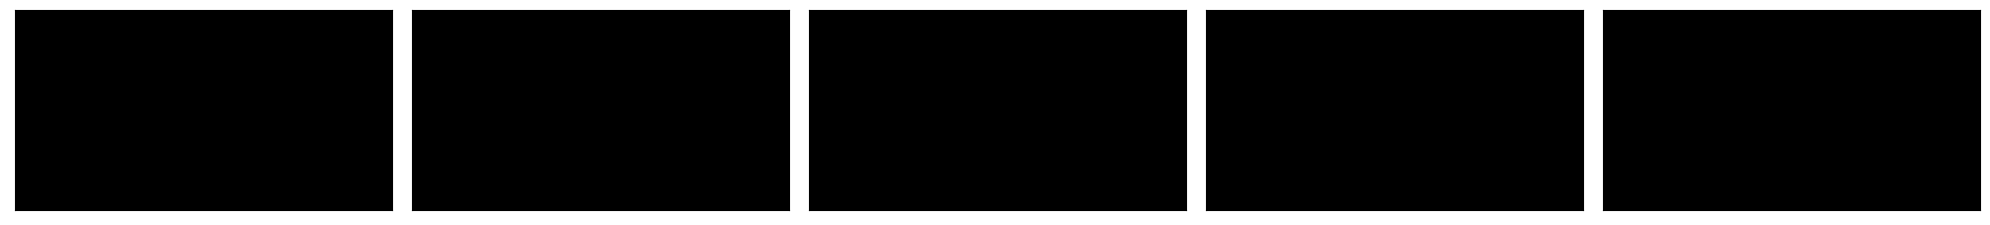

In [56]:
display_mri(preprocessed_image)

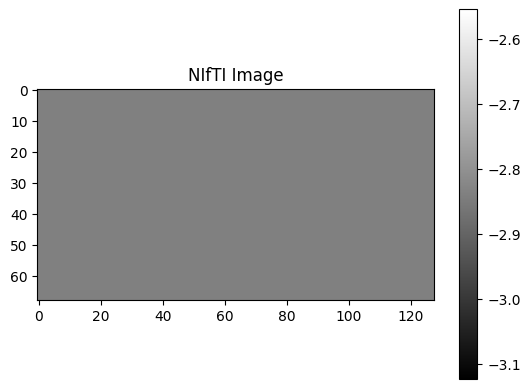

In [39]:
slice_number = 110  # Change this to the desired slice number
plt.imshow(preprocessed_image[:, :, slice_number], cmap='gray')
#plt.imshow(image_data[:, :, slice_number], cmap='gray', vmin=min_value, vmax=max_value)
plt.title('NIfTI Image')
plt.colorbar()
plt.show()
